In [4]:
!pip install folium

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('bayut_selling_properties.csv')

In [7]:
pd.set_option("display.max_columns", None)

In [8]:
df.shape

(41381, 22)

In [9]:
df.head() 

,price,price_category,type,beds,baths,address,furnishing,completion_status,post_date,average_rent,building_name,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,area_name,city,country,Latitude,Longitude,purpose
0,1450000,Medium,Apartment,1,2,"The Bay, Business Bay, Dubai",Furnished,Ready,2024-04-15,0,Unknown,0,0,0,0,0,Business Bay,Dubai,UAE,25.189427,55.264819,For Sale
1,6600000,High,Townhouse,5,5,"Brookfield, DAMAC Hills, Dubai",Unfurnished,Ready,2024-04-15,0,Unknown,0,0,0,0,0,DAMAC Hills,Dubai,UAE,25.028148,55.264246,For Sale
2,4825000,High,Apartment,2,3,"Vida Residence Downtown, Downtown Dubai, Dubai",Unfurnished,Ready,2024-04-18,288929,VIDA RESIDENCE DOWNTOWN,2018,510,56,1,11,Downtown Dubai,Dubai,UAE,25.186684,55.274705,For Sale
3,980000,Average,Apartment,3,3,"Building 39, Al Reef Downtown, Al Reef, Abu Dhabi",Unfurnished,Ready,2024-01-03,73384,Unknown,0,0,0,0,0,Al Reef,Abu Dhabi,UAE,24.466437,54.656891,For Sale
4,2499999,Medium,Townhouse,3,4,"Nima, The Valley, Dubai",Furnished,Off-Plan,2024-02-28,0,Unknown,0,0,0,0,0,The Valley,Dubai,UAE,25.019221,55.447201,For Sale


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41381 entries, 0 to 41380
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     41381 non-null  int64  
 1   price_category            41381 non-null  object 
 2   type                      41381 non-null  object 
 3   beds                      41381 non-null  int64  
 4   baths                     41381 non-null  int64  
 5   address                   41381 non-null  object 
 6   furnishing                41381 non-null  object 
 7   completion_status         41381 non-null  object 
 8   post_date                 41381 non-null  object 
 9   average_rent              41381 non-null  int64  
 10  building_name             41381 non-null  object 
 11  year_of_completion        41381 non-null  int64  
 12  total_parking_spaces      41381 non-null  int64  
 13  total_floors              41381 non-null  int64  
 14  total_

In [11]:
df.describe()

,price,beds,baths,average_rent,year_of_completion,total_parking_spaces,total_floors,total_building_area_sqft,elevators,Latitude,Longitude
count,4.138100e+04,41381.000000,41381.000000,4.138100e+04,41381.000000,41381.000000,41381.000000,41381.000000,41381.000000,41363.000000,41363.000000
mean,3.788624e+06,2.190957,3.007540,9.292880e+04,681.112491,172.559073,13.212126,142.931273,2.304463,25.037851,55.158407
std,8.482870e+06,1.567855,1.785553,2.503703e+05,953.886883,353.899074,20.298365,248.719849,4.440953,0.437348,0.513871
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,15.175847,43.351928
25%,1.100000e+06,1.000000,2.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.026710,55.135252
50%,2.000000e+06,2.000000,3.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,25.078641,55.245999
75%,3.600000e+06,3.000000,4.000000,1.243790e+05,2012.000000,198.000000,22.000000,211.000000,4.000000,25.189427,55.307913
max,4.825000e+08,11.000000,11.000000,2.807952e+07,2024.000000,2929.000000,89.000000,997.000000,42.000000,25.797689,56.361294


In [12]:
df.dtypes

price                         int64
price_category               object
type                         object
beds                          int64
baths                         int64
address                      object
furnishing                   object
completion_status            object
post_date                    object
average_rent                  int64
building_name                object
year_of_completion            int64
total_parking_spaces          int64
total_floors                  int64
total_building_area_sqft      int64
elevators                     int64
area_name                    object
city                         object
country                      object
Latitude                    float64
Longitude                   float64
purpose                      object
dtype: object

In [13]:
df.isnull().sum().sort_values(ascending=False)

Longitude                   18
Latitude                    18
price                        0
price_category               0
country                      0
city                         0
area_name                    0
elevators                    0
total_building_area_sqft     0
total_floors                 0
total_parking_spaces         0
year_of_completion           0
building_name                0
average_rent                 0
post_date                    0
completion_status            0
furnishing                   0
address                      0
baths                        0
beds                         0
type                         0
purpose                      0
dtype: int64

In [14]:
df = df.dropna(subset=['Latitude', 'Longitude'])

In [15]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

# Histogram

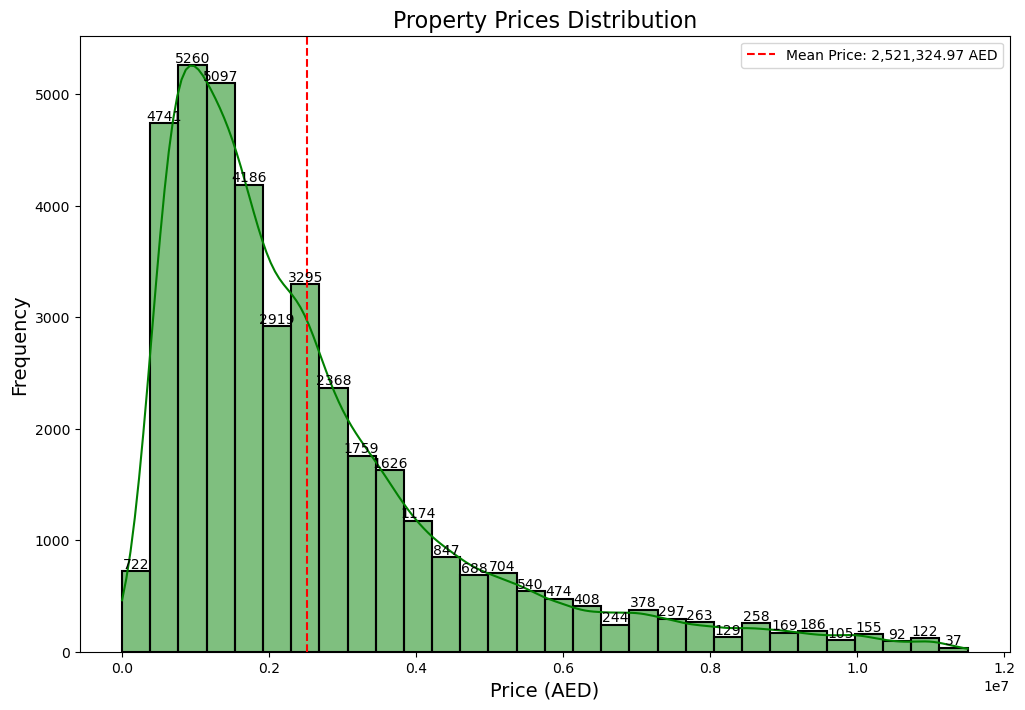

In [16]:
filtered_data = df[df['price'] < df['price'].quantile(0.95)]

plt.figure(figsize=(12, 8))
ax = sns.histplot(filtered_data['price'], bins=30, kde=True, color='green', edgecolor='black', linewidth=1.5)
plt.title('Property Prices Distribution', fontsize=16)
plt.xlabel('Price (AED)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# adds a vertical dashed red line at the mean price of the filtered data.
plt.axvline(filtered_data['price'].mean(), color='red', linestyle='--', label=f'Mean Price: {filtered_data["price"].mean():,.2f} AED')
plt.legend()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Heat Maps

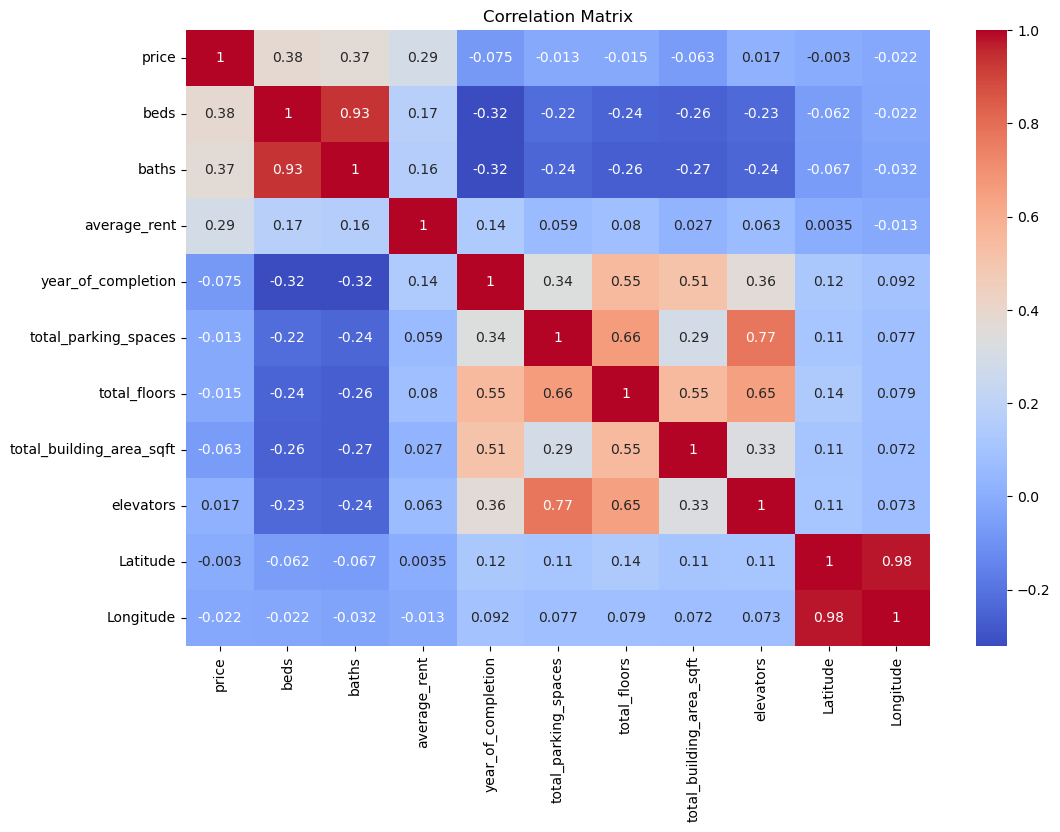

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plots

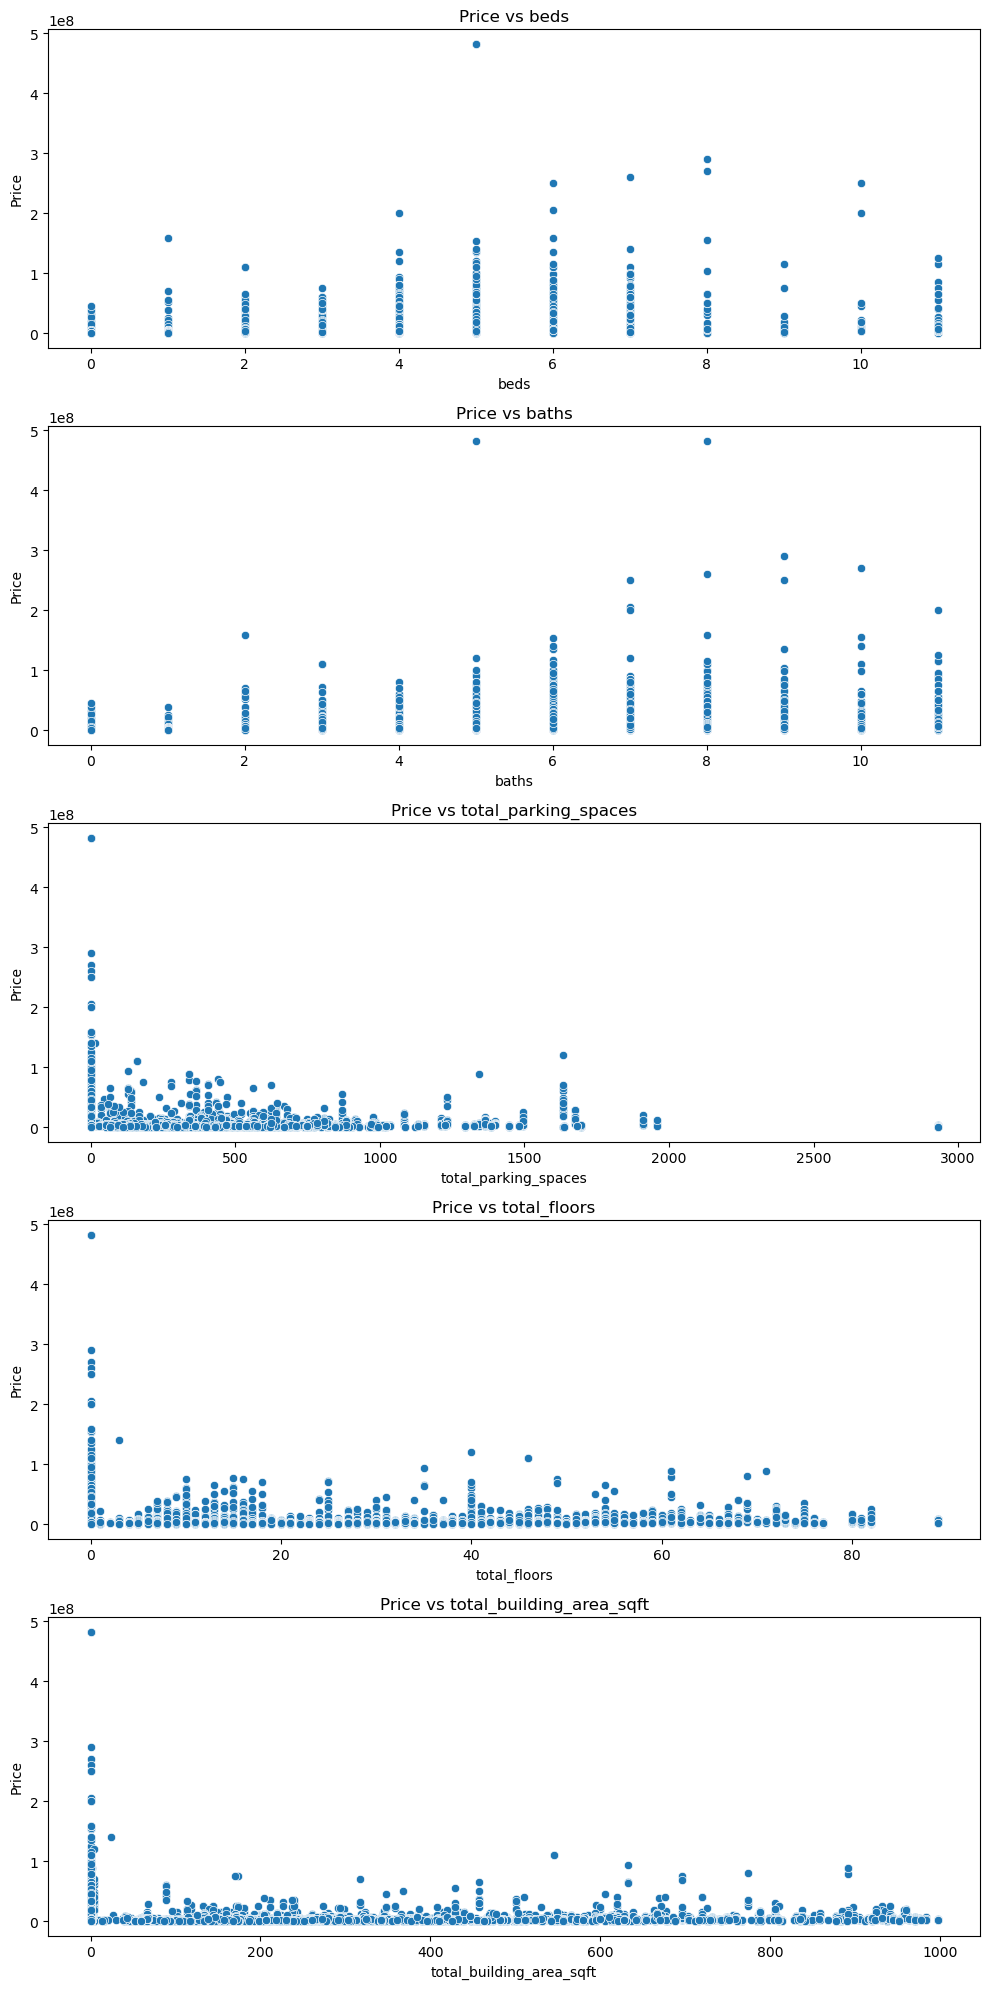

In [18]:
# Selecting a few numerical features to plot against price
features_to_plot = ['beds', 'baths', 'total_parking_spaces', 'total_floors', 'total_building_area_sqft']

fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(10, 20))

for i, feature in enumerate(features_to_plot):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[i])
    axes[i].set_title(f'Price vs {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

plt.tight_layout()
plt.show()

# Bar Charts

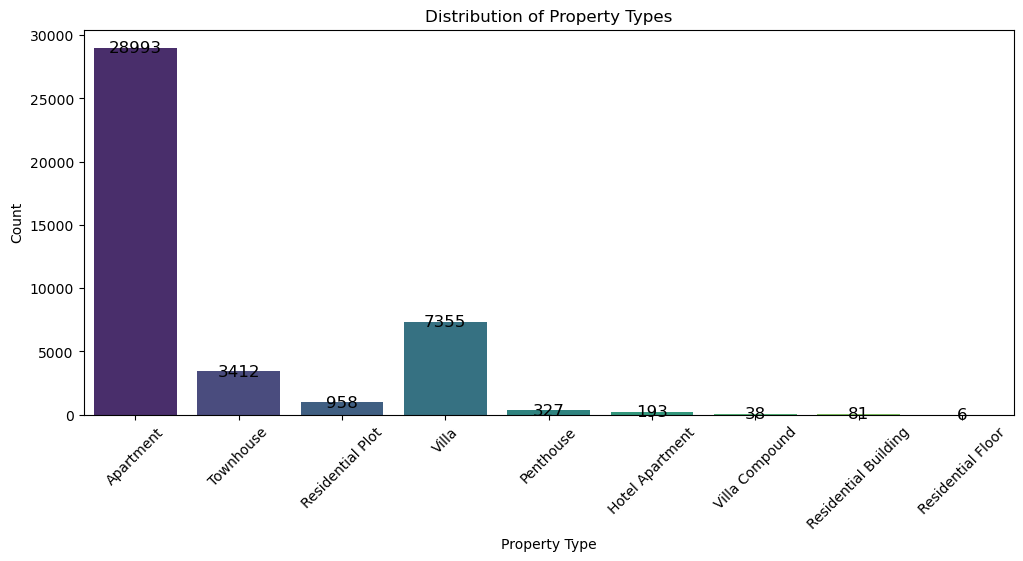

In [19]:
plt.figure(figsize=(12, 5))
ax_type = sns.countplot(data=df, x='type', palette='viridis')
plt.title('Distribution of Property Types')
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
for p in ax_type.patches:
    ax_type.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=12, color='black')
plt.show()

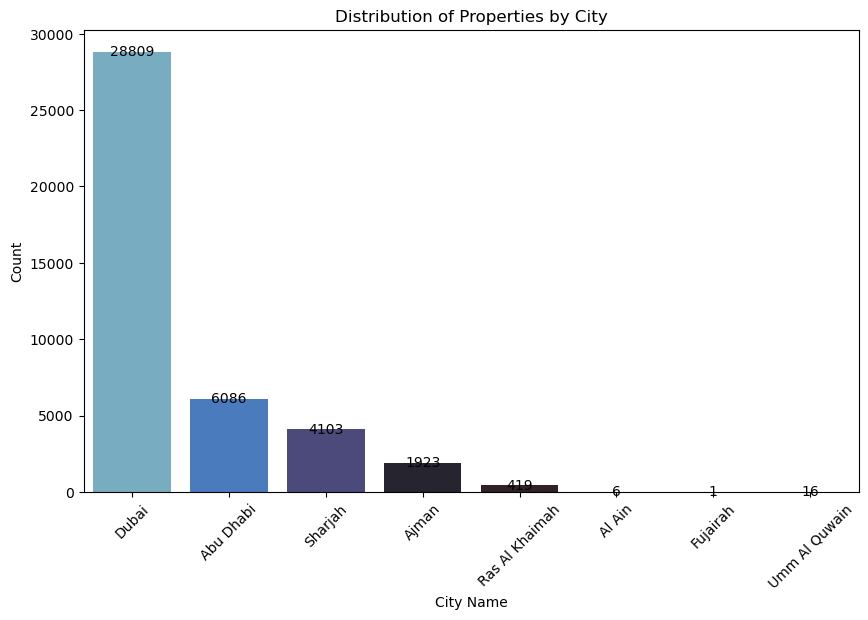

In [20]:
plt.figure(figsize=(10, 6))
ax_city = sns.countplot(data=df, x='city', palette='icefire')
plt.title('Distribution of Properties by City')
plt.xlabel("City Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
for p in ax_city.patches:
    ax_city.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', fontsize=10, color='black')
plt.show()

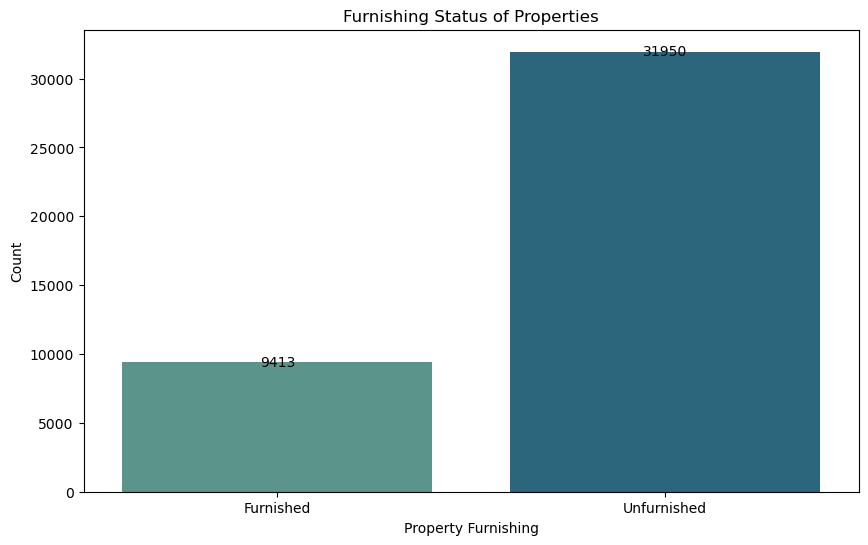

In [21]:
plt.figure(figsize=(10, 6))
ax_furnishing = sns.countplot(data=df, x='furnishing', palette='crest')
plt.title('Furnishing Status of Properties')
plt.xlabel("Property Furnishing")
plt.ylabel("Count")
for p in ax_furnishing.patches:
    ax_furnishing.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', fontsize=10, color='black')
plt.show()

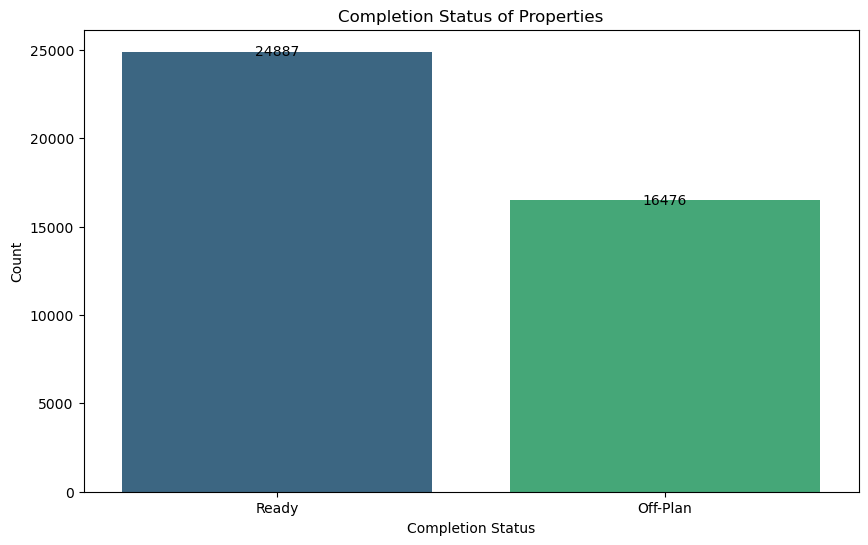

In [22]:
# Bar chart for 'completion_status'
plt.figure(figsize=(10, 6))
ax_completion = sns.countplot(data=df, x='completion_status', palette='viridis')
plt.title('Completion Status of Properties')
plt.xlabel("Completion Status")
plt.ylabel("Count")
for p in ax_completion.patches:
    ax_completion.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha='center', va='center', fontsize=10, color='black')
plt.show()

In [ ]:
df['post_date'] = pd.to_datetime(df['post_date'])
df['weekday'] = df['post_date'].dt.weekday

# Group by weekday and count properties
weekday_counts = df.groupby('weekday').size().reset_index(name='count')

# Sort by weekday for meaningful order in visualization
weekday_counts.sort_values('weekday', inplace=True)

# Map weekday numbers to weekday names for better readability in the chart
weekday_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday_counts['weekday_name'] = weekday_counts['weekday'].map(weekday_names)

# Visualizing with Plotly for an interactive bar chart
fig = px.bar(weekday_counts, x='weekday_name', y='count', title='Number of Properties Listed by Weekday',
             labels={'count': 'Number of Listings', 'weekday_name': 'Weekday'})

# Add annotations for each bar to display the count
for index, row in weekday_counts.iterrows():
    fig.add_annotation(x=row['weekday_name'], y=row['count'], text=str(row['count']),
                       showarrow=False, yshift=10, font=dict(color="black", size=12))

fig.update_layout(xaxis_title='Weekday', yaxis_title='Number of Listings')
fig.update_traces(marker_color='rgb(10,140,208)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
fig.show()

In [ ]:
# Ensure the data types are correct, especially 'price' which should be numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)  # Remove rows where price could not be converted

# Group data by city and price category to count properties
city_price_counts = df.groupby(['city', 'price_category']).size().reset_index(name='Count')

# Calculate highest, lowest, and average property price for each group
city_price_stats = df.groupby(['city', 'price_category']).agg(
    Highest_Price=('price', 'max'),
    Lowest_Price=('price', 'min'),
    Average_Price=('price', 'mean')
).reset_index()

# Merge the count data with price statistics
city_price_merged = city_price_counts.merge(city_price_stats, on=['city', 'price_category'])

# Create the bar chart again with the correct hover information
fig = px.bar(city_price_merged, x='city', y='Count', color='price_category',
             title='Distribution of Price Categories by City',
             labels={'Count': 'Number of Properties'},
             barmode='group')

# Update layout for better visualization
fig.update_layout(xaxis_title='City',
                  yaxis_title='Number of Properties',
                  xaxis={'categoryorder':'total descending'},
                  legend_title_text='Price Category')

# Add custom data for hover info, fixing the display of price category
fig.update_traces(
    hovertemplate="<br>".join([
        "City: %{x}",
        "Price Category: %{marker.color}",
        "Properties Count: %{y}",
        "Highest Price (AED): %{customdata[0]}",
        "Lowest Price (AED): %{customdata[1]}",
        "Average Price (AED): %{customdata[2]:.2f}"
    ]),
    customdata=np.stack((city_price_merged['Highest_Price'], city_price_merged['Lowest_Price'], city_price_merged['Average_Price'], city_price_merged['price_category']), axis=-1)
)

# Ensure the 'Price Category' is correctly displayed instead of the color reference
fig.update_traces(hovertemplate="<br>".join([
    "City: %{x}",
    "Price Category: %{customdata[3]}",
    "Properties Count: %{y}",
    "Highest Price (AED): %{customdata[0]}",
    "Lowest Price (AED): %{customdata[1]}",
    "Average Price (AED): %{customdata[2]:.2f}"
]))

fig.show()

In [ ]:
# Filter the data for the cities of interest: Dubai, Abu Dhabi, Sharjah, and Ajman
cities_data = df[df['city'].isin(['Dubai', 'Abu Dhabi', 'Sharjah', 'Ajman'])]

# Group by city and calculate average price
city_prices = cities_data.groupby('city')['price'].mean().reset_index()

# Create a bar chart to compare average prices across Dubai, Abu Dhabi, Sharjah, and Ajman
fig = px.bar(city_prices, x='city', y='price',
             title='Average Property Prices: Dubai vs Abu Dhabi vs Sharjah vs Ajman',
             labels={'price': 'Average Price', 'city': 'City'},
             color='city',
             color_continuous_scale=px.colors.sequential.Rainbow)

# Update layout for better visualization
fig.update_layout(xaxis_title='City',
                  yaxis_title='Average Price (AED)',
                  coloraxis_showscale=True)
fig.show()

In [ ]:
# Filter the data for the city of Dubai and then find the top 10 highest price areas
dubai_data = df[df['city'] == 'Dubai']

# Group by area and calculate average price, then sort and get top 10
top_areas_dubai = dubai_data.groupby('area_name')['price'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar chart to show top 10 highest price areas in Dubai
fig = px.bar(top_areas_dubai, x='area_name', y='price',
             title='Top 10 Highest Price Areas in Dubai',
             labels={'price': 'Average Price', 'area_name': 'Area Name'},
             color='price',
             color_continuous_scale=px.colors.sequential.Viridis)

# Update layout for better visualization
fig.update_layout(xaxis_title='Area Name',
                  yaxis_title='Average Price (AED)',
                  coloraxis_showscale=True)
fig.show()

In [ ]:
dubai_data_low = df[df['city'] == 'Dubai']

# Group by area and calculate average price, then sort and get the bottom 10
bottom_areas_dubai = dubai_data_low.groupby('area_name')['price'].mean().sort_values(ascending=True).head(10).reset_index()

# Create a bar chart to show the top 10 lowest price areas in Dubai
fig = px.bar(bottom_areas_dubai, x='area_name', y='price',
             title='Top 10 Lowest Price Areas in Dubai',
             labels={'price': 'Average Price', 'area_name': 'Area Name'},
             color='price',
             color_continuous_scale=px.colors.sequential.Blues)

# Update layout for better visualization
fig.update_layout(xaxis_title='Area Name',
                  yaxis_title='Average Price (AED)',
                  coloraxis_showscale=True)
fig.show()

In [ ]:
# Filter the data for the city of Abu Dhabi
abu_dhabi_data = df[df['city'] == 'Abu Dhabi']

# Group by area, calculate average price, then sort and get top 10 highest price areas
top_areas_abu_dhabi = abu_dhabi_data.groupby('area_name')['price'].mean().sort_values(ascending=False).head(10).reset_index()

# Create a bar chart for the top 10 highest price areas in Abu Dhabi
fig_high = px.bar(top_areas_abu_dhabi, x='area_name', y='price',
                  title='Top 10 Highest Price Areas in Abu Dhabi',
                  labels={'price': 'Average Price', 'area_name': 'Area Name'},
                  color='price',
                  color_continuous_scale=px.colors.sequential.Viridis)

fig_high.show()

In [ ]:
# Group by area, calculate average price, then sort and get top 10 lowest price areas
bottom_areas_abu_dhabi = abu_dhabi_data.groupby('area_name')['price'].mean().sort_values(ascending=True).head(10).reset_index()

# Create a bar chart for the top 10 lowest price areas in Abu Dhabi
fig_low = px.bar(bottom_areas_abu_dhabi, x='area_name', y='price',
                 title='Top 10 Lowest Price Areas in Abu Dhabi',
                 labels={'price': 'Average Price', 'area_name': 'Area Name'},
                 color='price',
                 color_continuous_scale=px.colors.sequential.Blues)

# Update layout for both figures for better visualization
fig_high.update_layout(xaxis_title='Area Name',
                       yaxis_title='Average Price (AED)',
                       coloraxis_showscale=True)

fig_low.update_layout(xaxis_title='Area Name',
                      yaxis_title='Average Price (AED)',
                      coloraxis_showscale=True)

fig_low.show()

# Outlier Analysis - Box Plot

In [ ]:
# Setting up the style
sns.set_theme(style="whitegrid")

# Preparing to plot box plots for beds, baths, parking spaces, and price
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Box plot for 'price'
sns.boxplot(ax=axes[0, 0], data=df, x='price', color='lightblue')
axes[0, 0].set_title('Price (AED)')

# Box plot for 'beds'
sns.boxplot(ax=axes[0, 1], data=df, x='beds', color='skyblue')
axes[0, 1].set_title('Number of Beds')

# Box plot for 'baths'
sns.boxplot(ax=axes[1, 0], data=df, x='baths', color='lightgreen')
axes[1, 0].set_title('Number of Baths')

# Box plot for 'total_parking_spaces'
sns.boxplot(ax=axes[1, 1], data=df, x='total_parking_spaces', color='salmon')
axes[1, 1].set_title('Total Parking Spaces')

plt.tight_layout()
plt.show()

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering the data without outliers
    filtered_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_data

# Applying the function to each column
data_filtered = df.copy()
for column in ['beds', 'baths', 'total_parking_spaces', 'price']:
    data_filtered = remove_outliers(data_filtered, column)

# Comparing shapes to see how many outliers were removed
original_shape = df.shape
filtered_shape = data_filtered.shape

print(f'Original data shape: {original_shape}')
print(f'Filtered data shape: {filtered_shape}')

In [ ]:
# confirm to check all outliers are removed

# Preparing to plot box plots for beds, baths, parking spaces, and price
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Box plot for 'price'
sns.boxplot(ax=axes[0, 0], data=data_filtered, x='price', color='lightblue')
axes[0, 0].set_title('Price (AED)')

# Box plot for 'beds'
sns.boxplot(ax=axes[0, 1], data=data_filtered, x='beds', color='skyblue')
axes[0, 1].set_title('Number of Beds')

# Box plot for 'baths'
sns.boxplot(ax=axes[1, 0], data=data_filtered, x='baths', color='lightgreen')
axes[1, 0].set_title('Number of Baths')

# Box plot for 'total_parking_spaces'
sns.boxplot(ax=axes[1, 1], data=data_filtered, x='total_parking_spaces', color='salmon')
axes[1, 1].set_title('Total Parking Spaces')


plt.tight_layout()
plt.show()

# Model Training: Actual vs Predicted Prices

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('bayut_selling_properties.csv')

In [ ]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

# Model Visualization

In [ ]:
# Selecting relevant features and target variable
X = df[['beds', 'baths', 'total_building_area_sqft', 'average_rent']]
y = df['price']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

In [ ]:
# Dictionary to store metrics
metrics = {
    'Model': [],
    'MAE': [],
    'MSE': [],
    'R²': []
}

# Model Prediction

In [ ]:
# Train, predict, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict
    predicted_prices = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, predicted_prices)
    mse = mean_squared_error(y_test, predicted_prices)
    r2 = r2_score(y_test, predicted_prices)
    
    # Store metrics in dictionary
    metrics['Model'].append(model_name)
    metrics['MAE'].append(mae)
    metrics['MSE'].append(mse)
    metrics['R²'].append(r2)

In [ ]:
# Visualization of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_prices, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.title('Actual vs. Predicted Property Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [ ]:
# Model Evaluation

In [ ]:
# Convert metrics dictionary to DataFrame for better visualization
metrics_df = pd.DataFrame(metrics)

# Print and display metrics
print(metrics_df)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Model', y='MAE', palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Model', y='MSE', palette='viridis')
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_df, x='Model', y='R²', palette='viridis')
plt.title('R² Score Comparison')
plt.ylabel('R²')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # R² score ranges from 0 to 1
plt.show()